<img src="./images/logo1.png">

# <center> Introducción al Análisis de Datos con R 

## Práctica III: Manipulación de datos

In [65]:
library("tidyverse")
library("dplyr")
library("ggplot2")
library("plotly")
options(repr.plot.width=16, repr.plot.height=8)

In [27]:
file_names = c('STRT', 'AGNC', 'BBQ', 'NVCN', 'SLAB')

In [50]:
df <- read.csv('./datasets/STRT.csv') %>% 
    mutate(Date = as.Date(Date, format = "%Y-%m-%d"),
           Name = rep('STRT', nrow(.)))  %>%
    select(Name, Date, High, Low, Close)

head(df)



,Name,Date,High,Low,Close
,<chr>,<date>,<dbl>,<dbl>,<dbl>
1,STRT,2010-01-04,18.73,18.68,18.73
2,STRT,2010-01-05,19.22,19.02,19.21
3,STRT,2010-01-06,18.66,18.66,18.66
4,STRT,2010-01-07,19.72,18.95,19.72
5,STRT,2010-01-08,20.70,19.73,20.68
6,STRT,2010-01-11,20.72,20.18,20.32


In [43]:

for(i in 1:length(file_names)){
    file <- paste('./datasets/', file_names[i], '.csv', sep='')
    if(i == 1){
        base <- read_csv(file) %>% 
            mutate(Date = as.Date(Date, format = "%Y-%m-%d"),
                   Name = rep(file_names[i], nrow(.))) %>%
            select(Name, Date, High, Low, Close)
    }else{
        df <- read_csv(file) %>% 
            mutate(Date = as.Date(Date, format = "%Y-%m-%d"),
                   Name = rep(file_names[i], nrow(.))) %>%
            select(Name, Date, High, Low, Close)
        
        base <- rbind(base, df)
    }
    
}

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double()

In [46]:
head(base)

Name,Date,High,Low,Close
<chr>,<date>,<dbl>,<dbl>,<dbl>
STRT,2010-01-04,18.73,18.68,18.73
STRT,2010-01-05,19.22,19.02,19.21
STRT,2010-01-06,18.66,18.66,18.66
STRT,2010-01-07,19.72,18.95,19.72
STRT,2010-01-08,20.70,19.73,20.68
STRT,2010-01-11,20.72,20.18,20.32


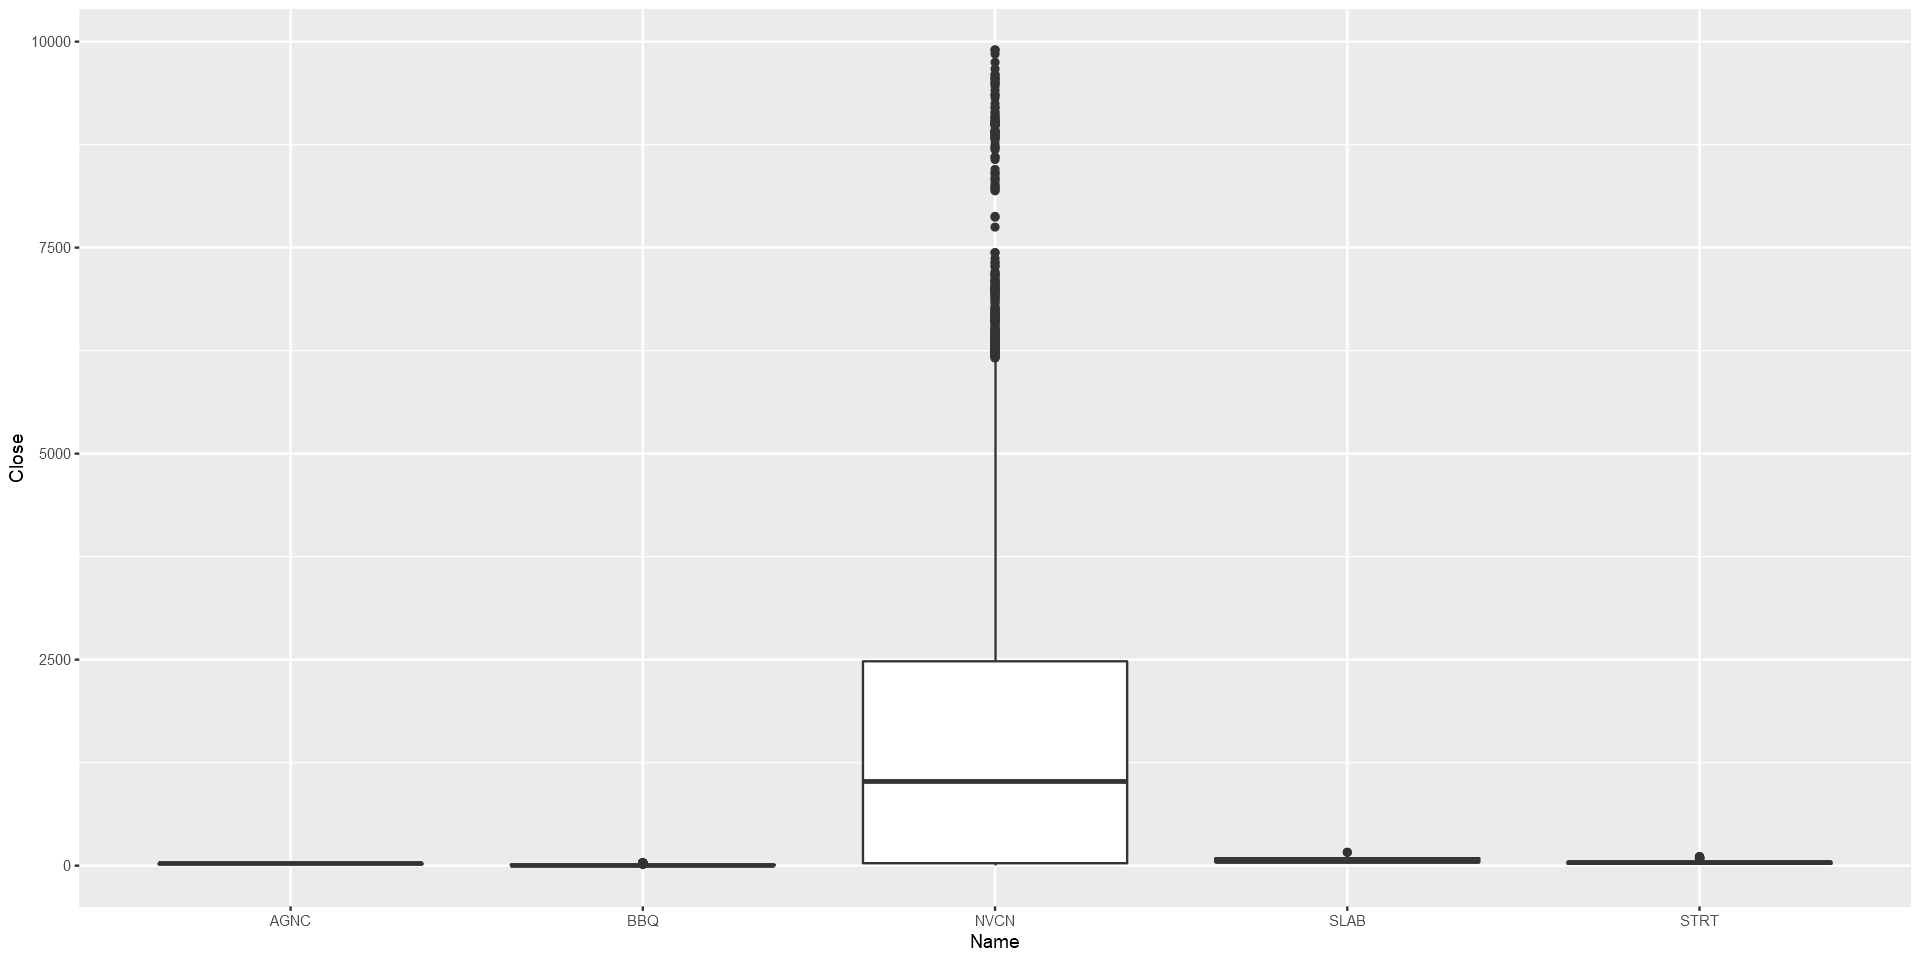

In [66]:
p <- ggplot(base, aes(x=Name, y=Close)) + 
  geom_boxplot()
p

In [67]:
base2 <- base %>% 
    pivot_longer(cols=c('High', 'Low', 'Close'), names_to = 'type', values_to = 'value')
head(base2)

Name,Date,type,value
<chr>,<date>,<chr>,<dbl>
STRT,2010-01-04,High,18.73
STRT,2010-01-04,Low,18.68
STRT,2010-01-04,Close,18.73
STRT,2010-01-05,High,19.22
STRT,2010-01-05,Low,19.02
STRT,2010-01-05,Close,19.21


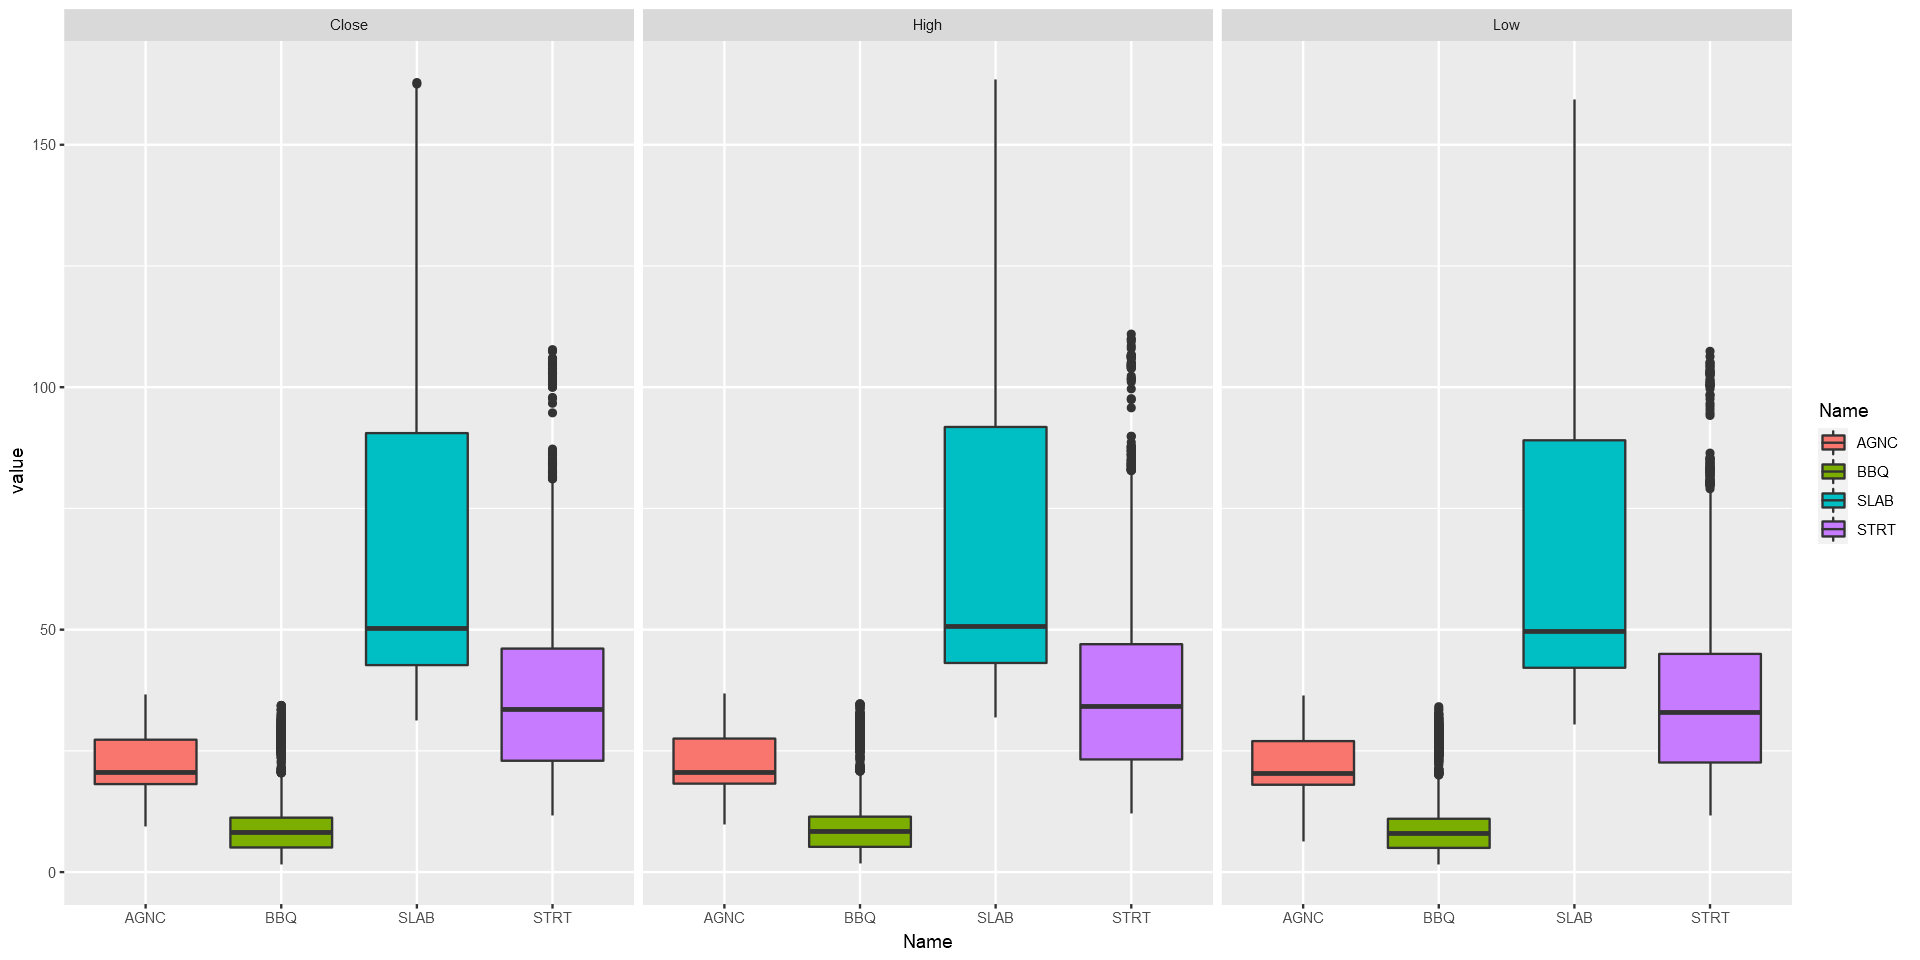

In [118]:
p2 <- ggplot(base2 %>% filter(Name != 'NVCN'),aes(x=Name, y=value, fill=Name)) +
    geom_boxplot() + 
    facet_wrap(~type)
p2

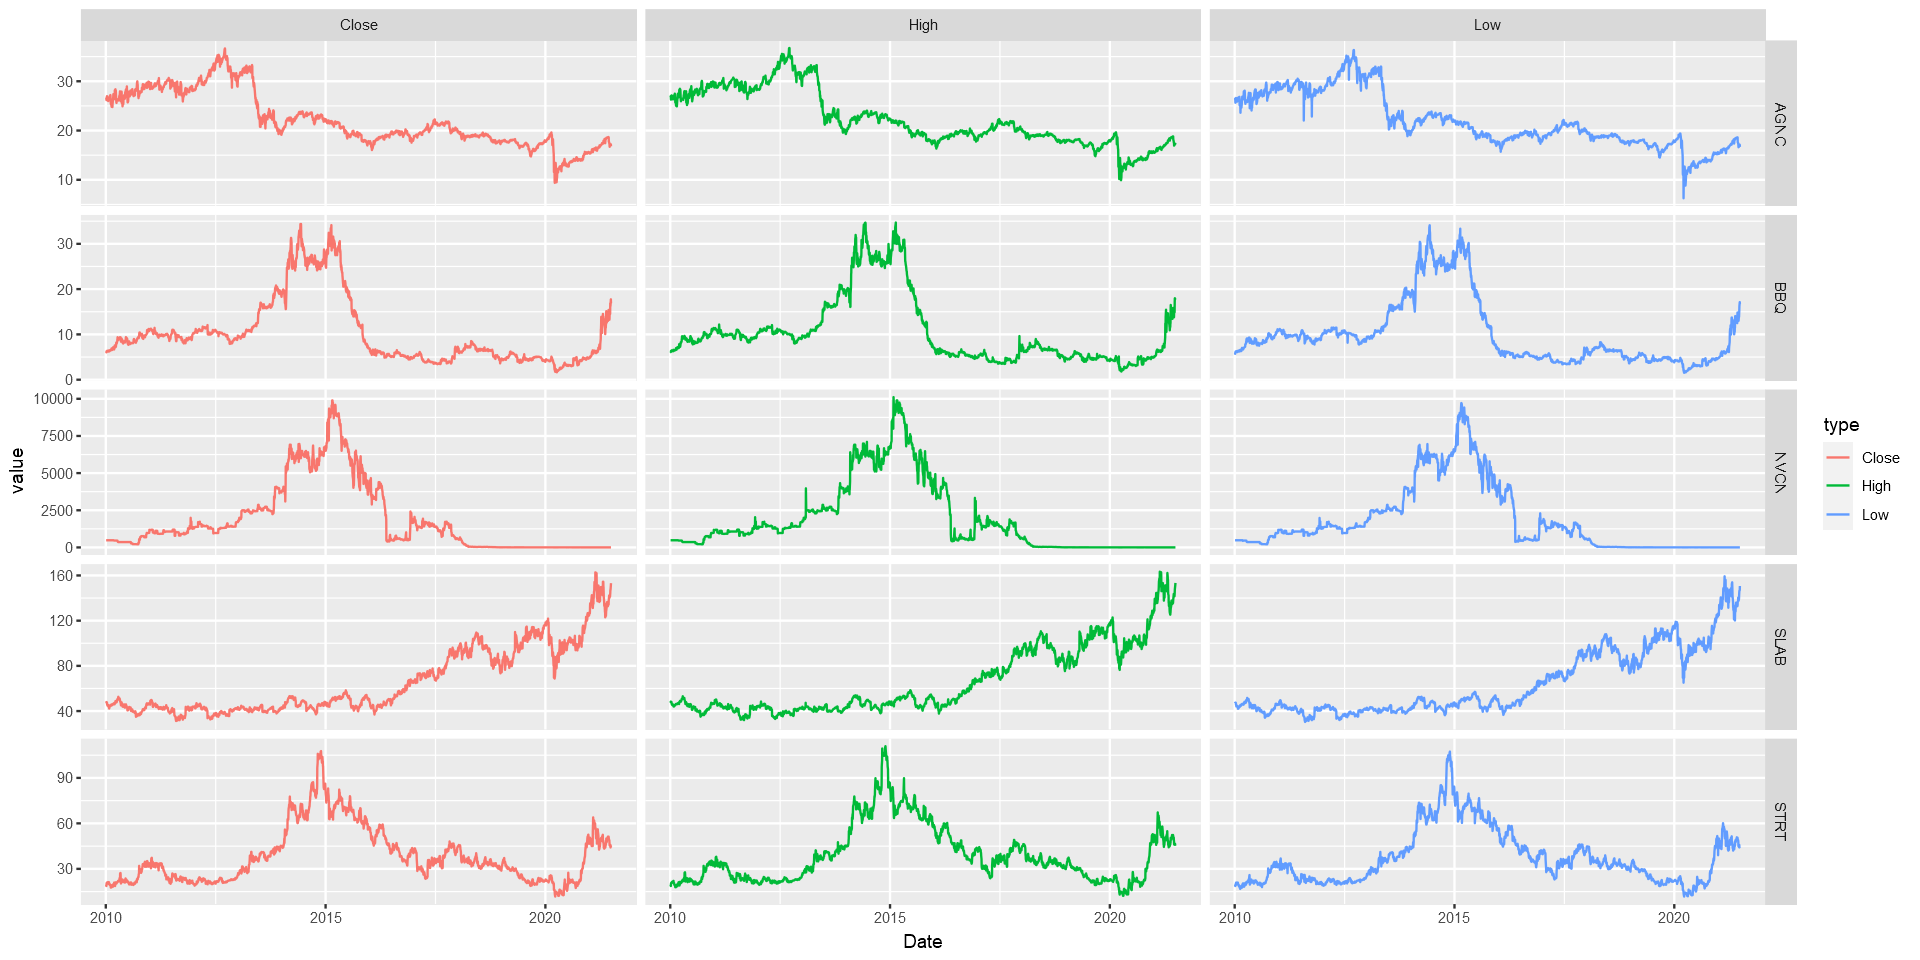

In [111]:
p3 <- ggplot(base2 , aes(x=Date, y=value, color=type)) +
    geom_line() +
    facet_grid(rows = vars(Name), cols=vars(type), scales = "free")
p3

## Distribución

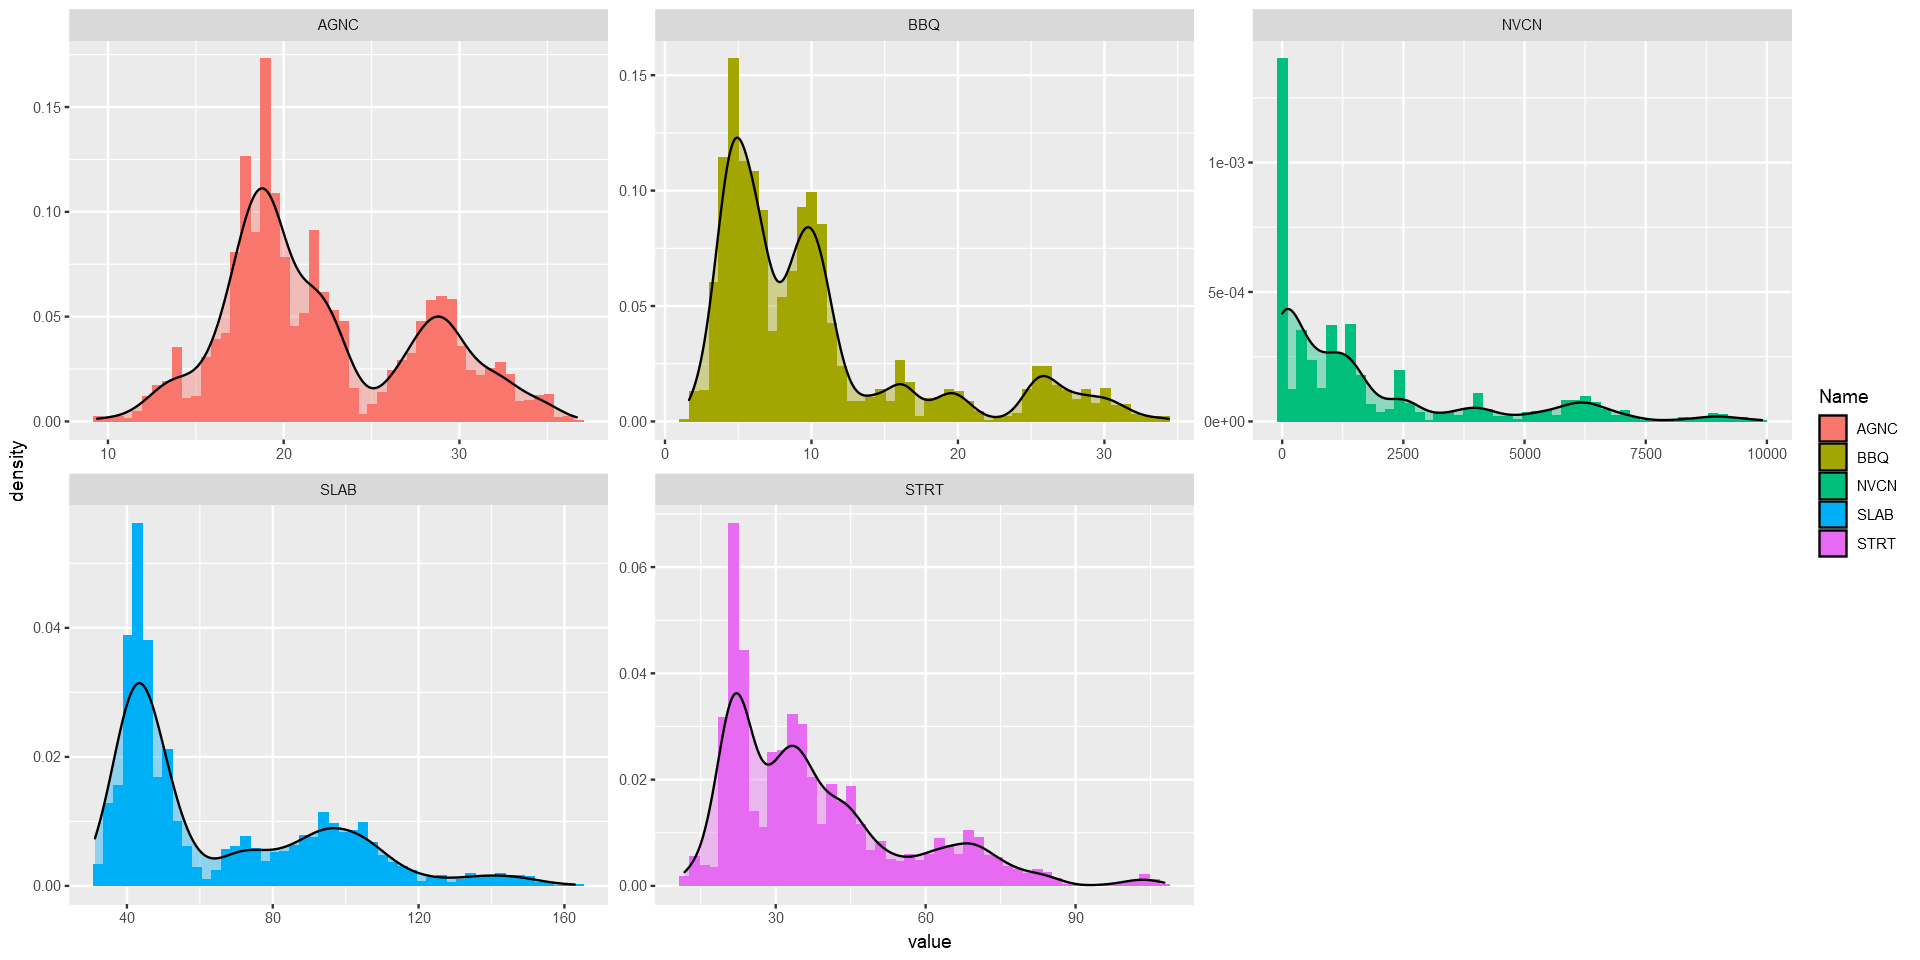

In [116]:
p4 <- ggplot(base2 %>% filter(type == 'Close'), aes(x=value, fill=Name)) +
    geom_histogram(aes(y = ..density..), bins=50) +
    geom_density(alpha = 0.4) +
    facet_wrap(~Name, scales = "free")
p4